In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import datetime
from IPython.display import display
from IPython.core.display import Markdown

branches = pd.read_csv("./data/branches.csv")
pipeline_schedules = pd.read_csv("./data/schedules.csv")

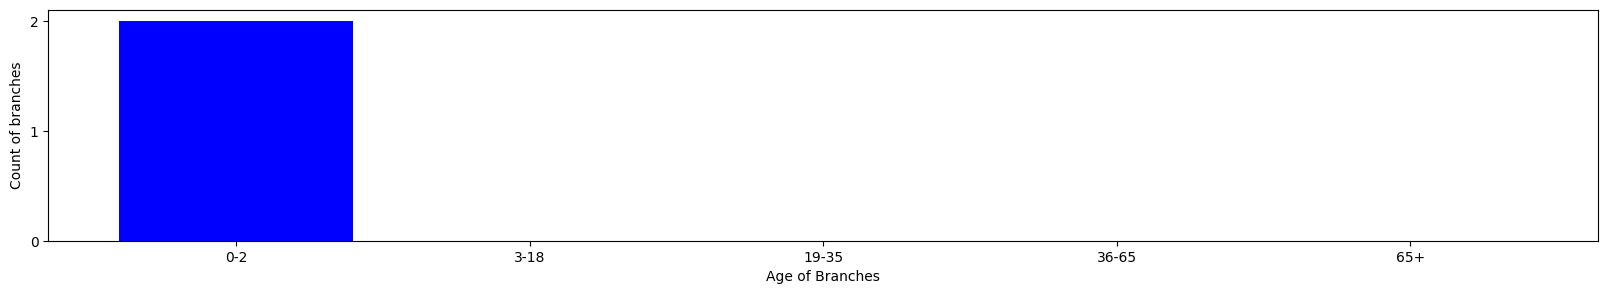

In [2]:
display(Markdown("## Graphs"))
display(Markdown("### Breakdown of the age of branches (including default branch) "))

branches["Last Commit Age"] = [(datetime.datetime.now() - datetime.datetime.strptime(branches.at[row_index, "Last Commit Authored Date"], "%Y-%m-%dT%H:%M:%S+00:00")).days for row_index in range(len(branches))]

bins = [-1, 2, 18, 35, 65, np.inf]
names = ['0-2', '3-18', '19-35', '36-65', '65+']
# right=True means the right of the two values is counted in the bin. For example the number 18 is in the 3-18 bin
branches["Last Commit Age Bucket"] = pd.cut(branches['Last Commit Age'], bins, right=True, labels=names)

age_buckets = pd.DataFrame({
    "Bucket": names,
    "Bucket Count": branches.groupby("Last Commit Age Bucket")["Last Commit Age Bucket"].count(),
})

fig, ax = plt.subplots(1, 1, figsize=(20,3))

ax.bar(age_buckets["Bucket"],age_buckets["Bucket Count"], color='blue')

ax.set_xlabel("Age of Branches")
ax.set_xticks(age_buckets["Bucket"])

ax.set_ylabel("Count of branches")
max_count = age_buckets["Bucket Count"].max()
ax.set_yticks(np.arange(0, max_count + (max_count * .30)))

plt.show()


In [3]:
counts = pipeline_schedules["Pipeline Schedule Owner Username"].value_counts()

pipeline_schedule_count = pd.DataFrame({
    "Count": counts,
    "Is Active?": [ pipeline_schedules[pipeline_schedules["Pipeline Schedule Owner Username"] == key].iloc[0]["Pipeline Schedule Is Active?"] for key in counts.keys()],
    "Email Address": [ pipeline_schedules[pipeline_schedules["Pipeline Schedule Owner Username"] == key].iloc[0]["Pipeline Schedule Owner Public Email"] for key in counts.keys()],
})

number_of_items_to_display = 20
display(Markdown(f"## Top {number_of_items_to_display} Usernames with the greatest number of scheduled jobs associated"))
display(pipeline_schedule_count.sort_values(by="Count").head(20))


## Top 20 Usernames with the greatest number of scheduled jobs associated

,Count,Is Active?,Email Address
root,1,True,NaN


In [4]:
projects = branches["Project Name"].unique()
number_of_branches = []
last_commit_authored_date = []
last_commit_author = []
last_commit_title = []
last_commit_branch = []

for project in projects:
    number_of_branches.append(branches["Project Name"].value_counts()[project])

    commit_details = pd.DataFrame(branches[branches["Project Name"] == project]).sort_values(by="Last Commit Authored Date", ascending=False).iloc[0]

    last_commit_authored_date.append(commit_details["Last Commit Authored Date"])
    last_commit_author.append(commit_details["Last Commit Author"])
    last_commit_title.append(commit_details["Last Commit Title"])
    last_commit_branch.append(commit_details["Branch Name"])

branch_count_df = pd.DataFrame({
    "Project Name": projects,
    "Number of Branches": number_of_branches,
    "Last Commit Branch": last_commit_branch,
    "Last Commit Authored Date": last_commit_authored_date,
    "Last Commit Title": last_commit_title,
    "Last Commit Author": last_commit_author,
})

number_of_items_to_display = 20
display(Markdown(f"## Top {number_of_items_to_display} projects sorted by the number of open branches"))
display(branch_count_df.sort_values(by="Number of Branches", ascending=False).head(number_of_items_to_display).style.hide(axis="index"))

## Top 20 projects sorted by the number of open branches

Project Name,Number of Branches,Last Commit Branch,Last Commit Authored Date,Last Commit Title,Last Commit Author
test,2,main,2023-10-29T00:27:02+00:00,Initial commit,Administrator
